# Importing libraries

In [1]:
#importing neccessary libraries for eda
import numpy as np
import pandas as pd 
import sklearn 
import os
import matplotlib.pyplot as plt
import zipfile
import tqdm 
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import scipy

# Reading data

In [2]:
train_data=pd.read_csv("train_Df64byy.csv")
test_data=pd.read_csv("test_YCcRUnU.csv")
print('Train Data Shape ---->',train_data.shape)
print("\n")
print('Test Data Shape ----->',test_data.shape)

Train Data Shape ----> (50882, 14)


Test Data Shape -----> (21805, 13)


* Dataset consist of 13 features

# EDA (Exploratory Data Analysis)

In [3]:
train_data.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [4]:
test_data.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium'],
      dtype='object')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


### Target class distribution

In [7]:
train_data['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

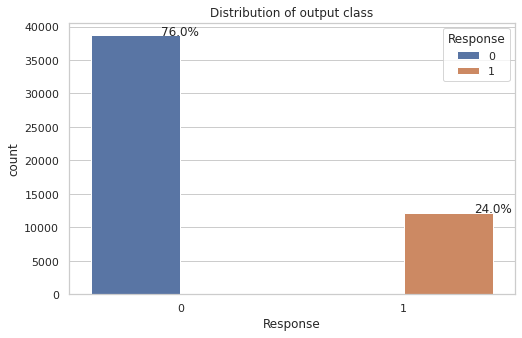

In [8]:
ax=sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(train_data))
ax = sns.countplot(x="Response", hue="Response", data=train_data)
plt.title("Distribution of output class")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

* It is a binary calss classification problem.
* From the above plot we acn understand that there is a problem of imbalance in dataset.

### Duplicate checks

In [9]:
print("Number of duplicate in train dataset : {} ".format(sum(train_data.duplicated())))
print("Number of duplicate in test dataset  : {} ".format(sum(test_data.duplicated())))

Number of duplicate in train dataset : 0 
Number of duplicate in test dataset  : 0 


### Nan/Null Value checks

In [10]:
print("We have {} NaN/Null values in train dataset ".format(train_data.isnull().values.sum()))
print("We have {} NaN/Null values in test dataset ".format(test_data.isnull().values.sum()))

We have 52193 NaN/Null values in train dataset 
We have 22233 NaN/Null values in test dataset 



* There is a large number of NaN/Null values are present in both train and test dataset since is large in count dropping the row is not good because we are reducing actual data in a large amount.
* We want to consider some imputation method to fill the values.

In [11]:
print(train_data.isna().sum())

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64


In [12]:
print(test_data.isna().sum())

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64


* Missing values are present in 3 features(Health Indicator ,Holding_Policy_Duration ,Holding_Policy_Type ), so we want to impute these features

### Handling missing values

We can impute these missing value for this feature in 3 ways.

* Frequency replacement
* Make Null/Nan value as seperate category
* Model based imputation

* We can try any of the above imputaionsmethods and, record the perfroamnce metric in each imputaion take best which one based on perfromance metric

##### Imputation - Health Indicator

In [13]:
train_data['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [14]:
#train_data['Health Indicator'].fillna(train_data['Health Indicator'].mode()[0], inplace=True) #Mode based imputation
train_data['Health Indicator'].fillna("X0", inplace=True) # Make Null/Nan value as seperate category

#### Imputation - Holding_Policy_Type

In [15]:
train_data['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [16]:
#train_data['Holding_Policy_Type'].fillna(train_data['Holding_Policy_Type'].mode()[0], inplace=True)#Mode based imputation
train_data['Holding_Policy_Type'].fillna(0, inplace=True)# Make Null/Nan value as seperate category

#### Imputation - Holding_Policy_Duration

In [17]:
train_data['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [18]:
#train_data['Holding_Policy_Duration'].fillna(train_data['Holding_Policy_Duration'].mode()[0], inplace=True) #Mode based imputation
train_data['Holding_Policy_Duration'].fillna("not", inplace=True)# Make Null/Nan value as seperate category

In [20]:
print(train_data.isna().sum())# checking is there any missing values are present

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64


### Plotting Based Analysis

In [35]:
train_data.nunique()

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator              10
Holding_Policy_Duration       16
Holding_Policy_Type            5
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

#### City_Code VS Response

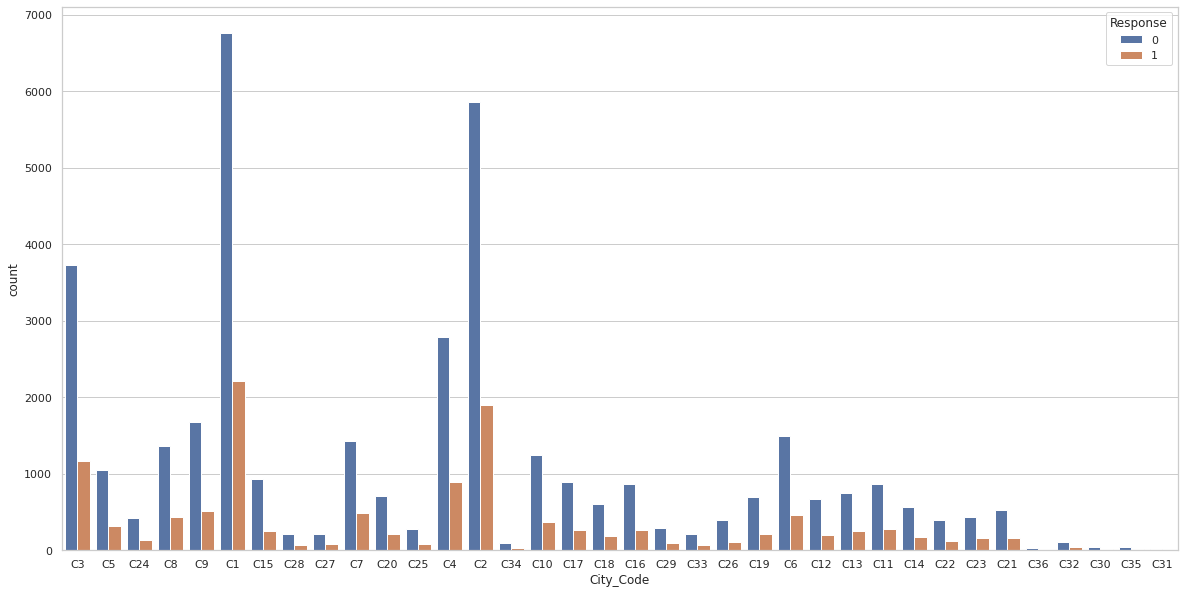

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x='City_Code',hue='Response',data=train_data)

* some cites like c1,c2 consist high distribution .
*  In all of the cities, class(response) 0 is dominating .

#### Accomodation_Type VS Response

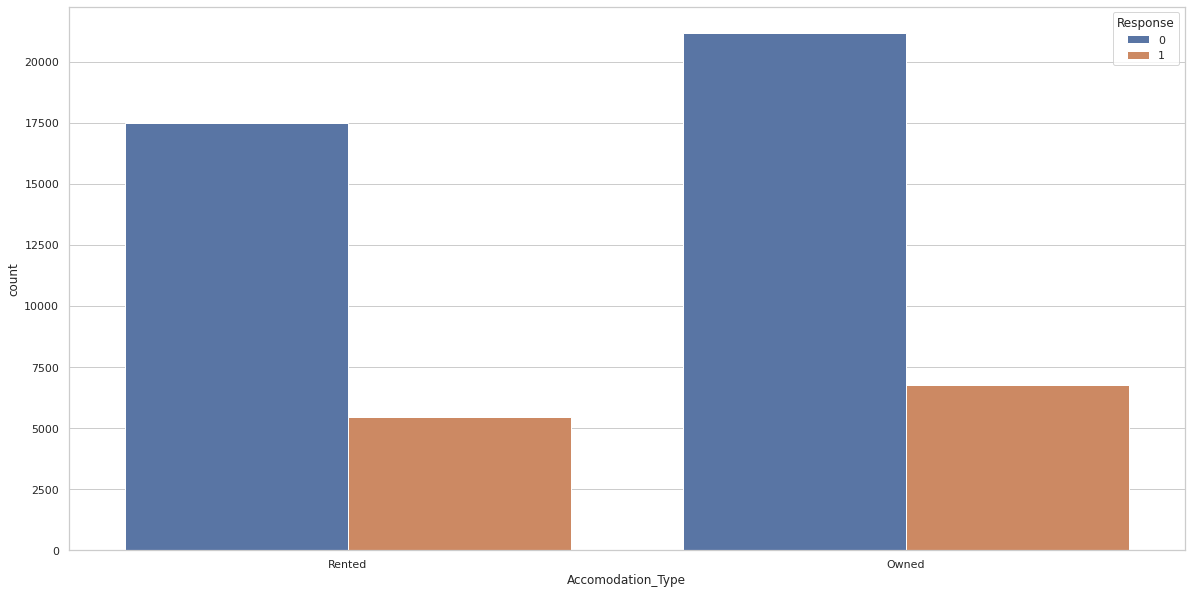

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x='Accomodation_Type',hue='Response',data=train_data)

* Customers who owned house have more interest on new insurance as compared to customers have rented house.

#### Is_Spouse VS Response

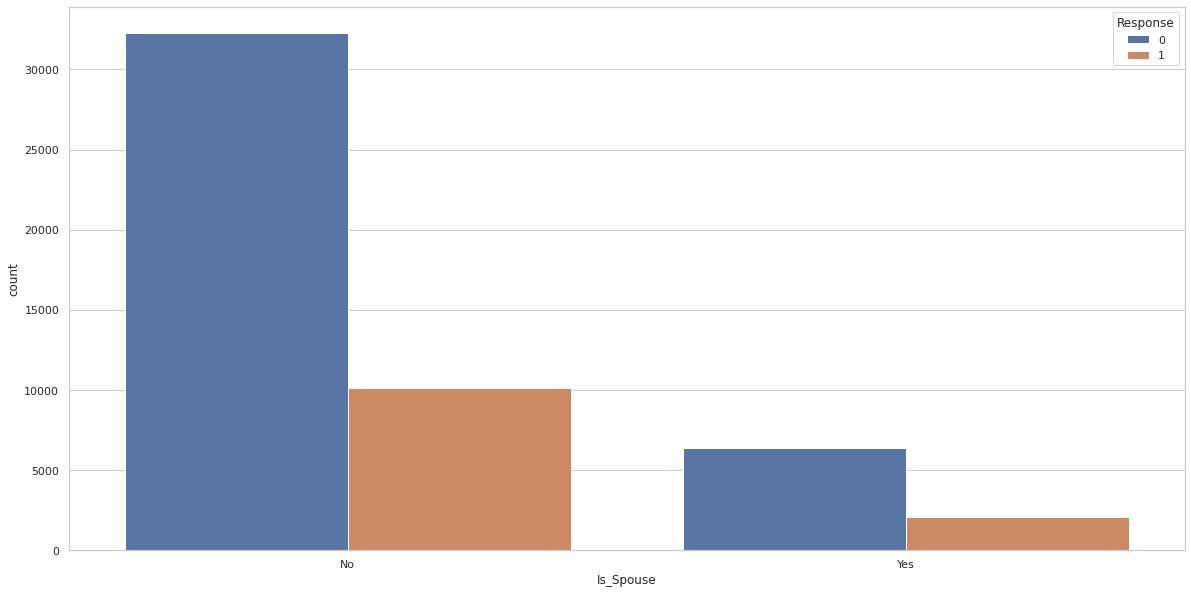

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x='Is_Spouse',hue='Response',data=train_data)

* Customers who marriaged have lesser interest on new insurance

#### Reco_Insurance_Type VS Response

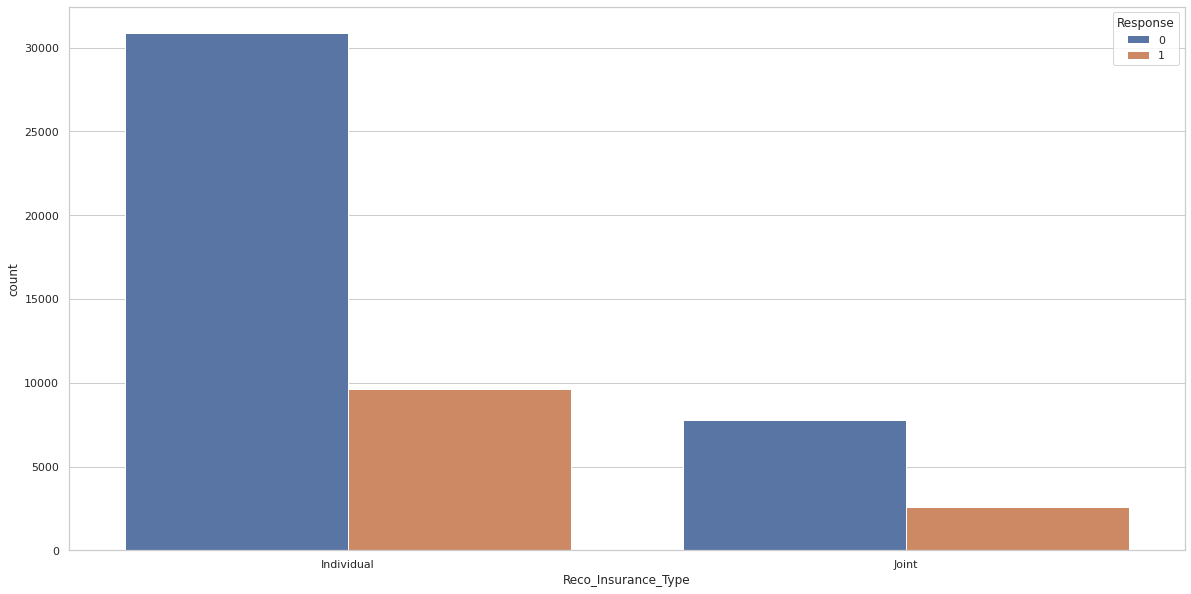

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='Reco_Insurance_Type',hue='Response',data=train_data)

* Most of customers interested on individual insurance

#### Health IndicatorVS Response

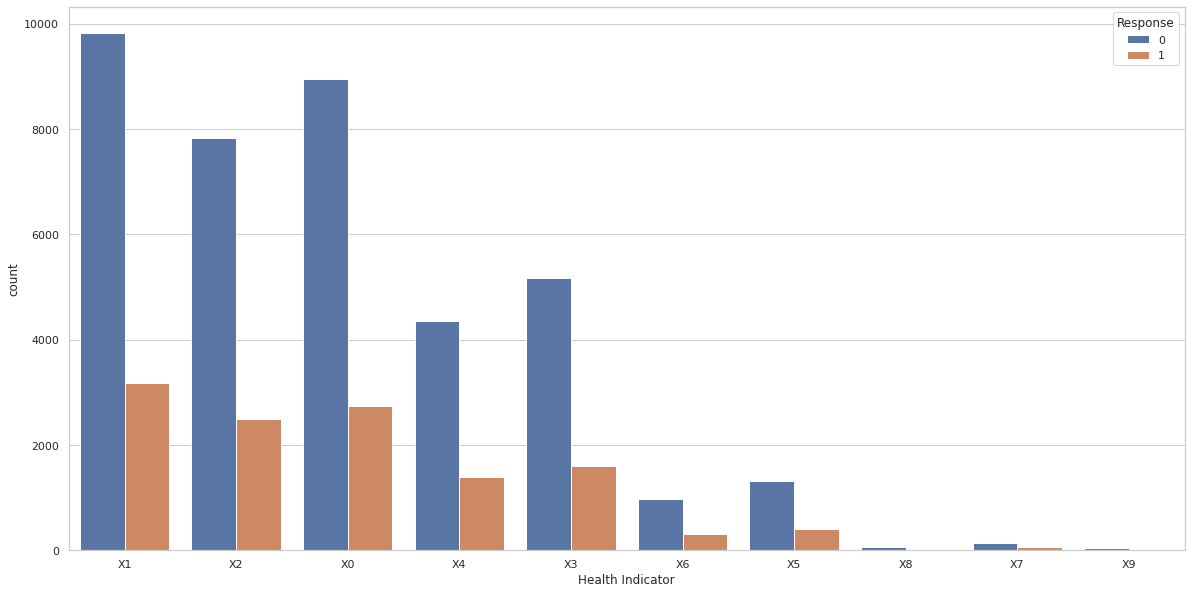

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='Health Indicator',hue='Response',data=train_data)

#### Holding_Policy_DurationVS Response

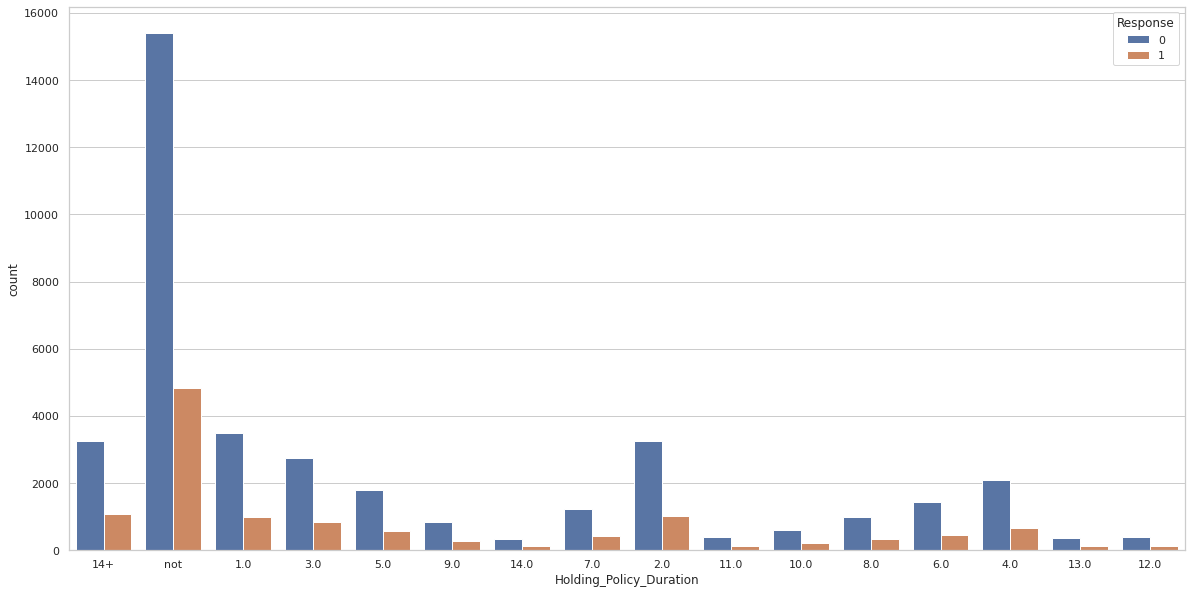

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x='Holding_Policy_Duration',hue='Response',data=train_data)

#### Holding_Policy_Type VS Response

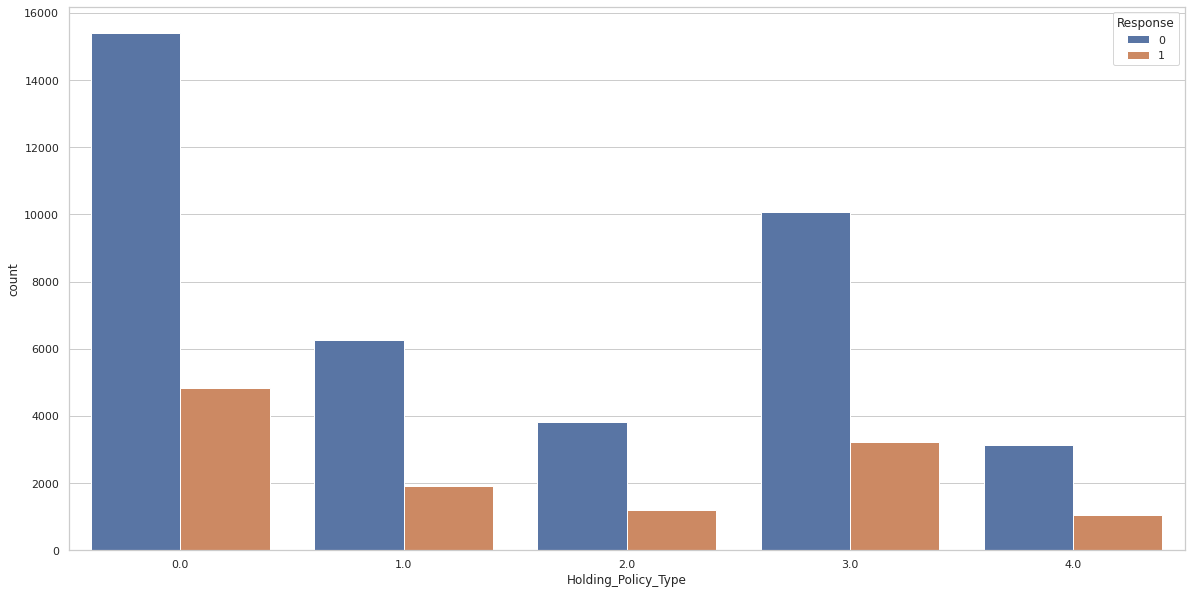

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(x='Holding_Policy_Type',hue='Response',data=train_data)

#### Holding_Policy_cat VS Response

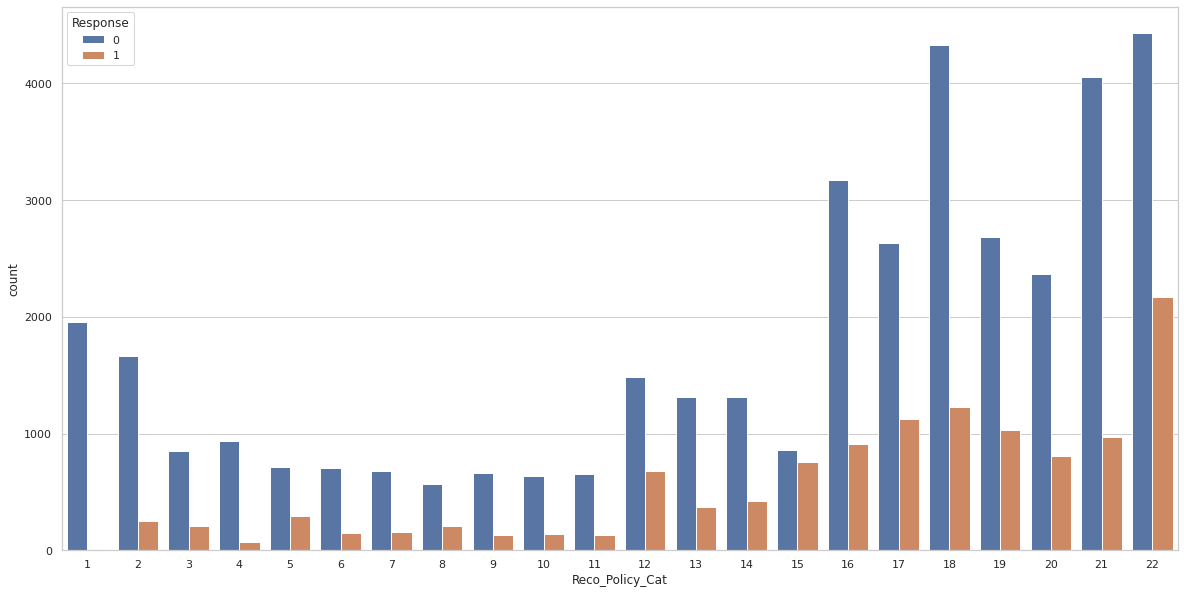

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x='Reco_Policy_Cat',hue='Response',data=train_data)

#### Upper Age

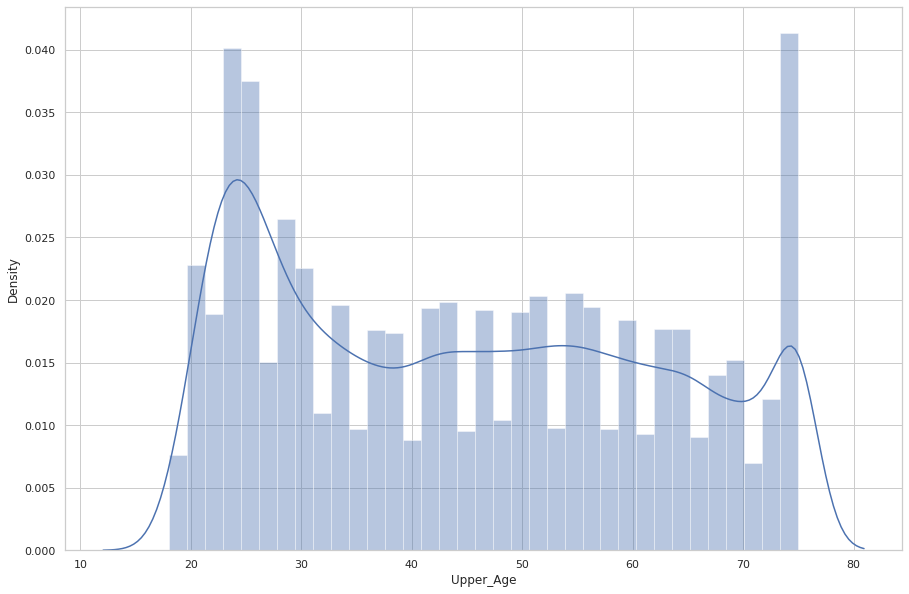

In [29]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['Upper_Age'], label='Train data')

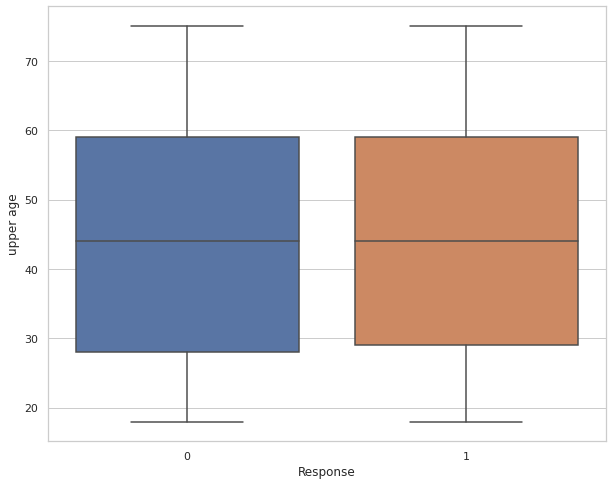

In [30]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Response', y='Upper_Age', data=train_data)
plt.ylabel("upper age", fontsize=12)
plt.xlabel("Response", fontsize=12)
plt.show()

#### Lower Age

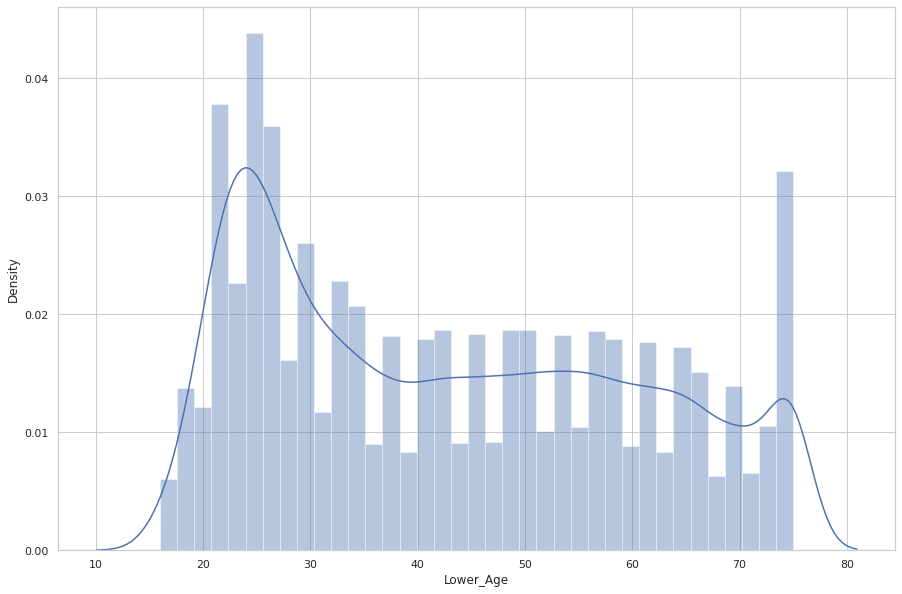

In [31]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['Lower_Age'], label='Train data')

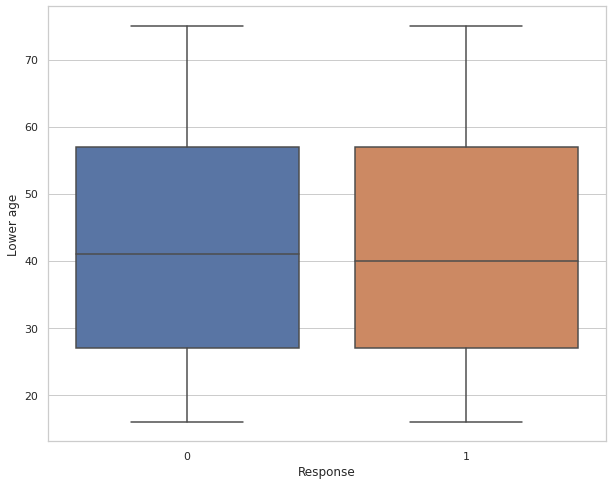

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Response', y='Lower_Age', data=train_data)
plt.ylabel("Lower age", fontsize=12)
plt.xlabel("Response", fontsize=12)
plt.show()

#### Reco_Policy_Premium

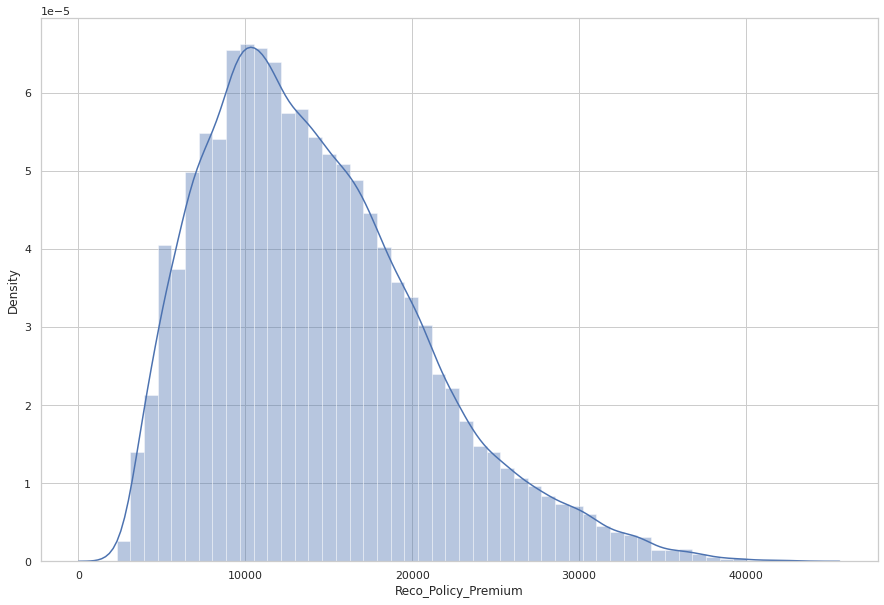

In [33]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['Reco_Policy_Premium'], label='Train data')

# Observations After EDA

* The dataset consists of 13 features.
* It is a binary classification problem.
* The dataset is imbalanced.
* Both train and test dataset contains a large number of missing values , so they should be imputed in an appropriate way.
* Most of the features are categorical.

* we are not getting much information from plots .

In [ ]:
# saving file after missing value imputation and eda

train_data.to_csv("after eda.csv",index=False)